Użyj `subplots()` aby manualnie stworzyć wykres par dla danych `iris` podobny do tego z przykładu powyżej. Podanie parametrów `sharex`, `sharey` pozwala współdzielić osie wykresów. Dodaj opisy do osi zewnętrznych wykresów (metodą `ax.set_title()`). Nie jest wymagane rysowanie histogramów na przekątnej. W przypadku dużego zagęszczenia punktów na wykresie warto zmniejszyć parametr `alpha`.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


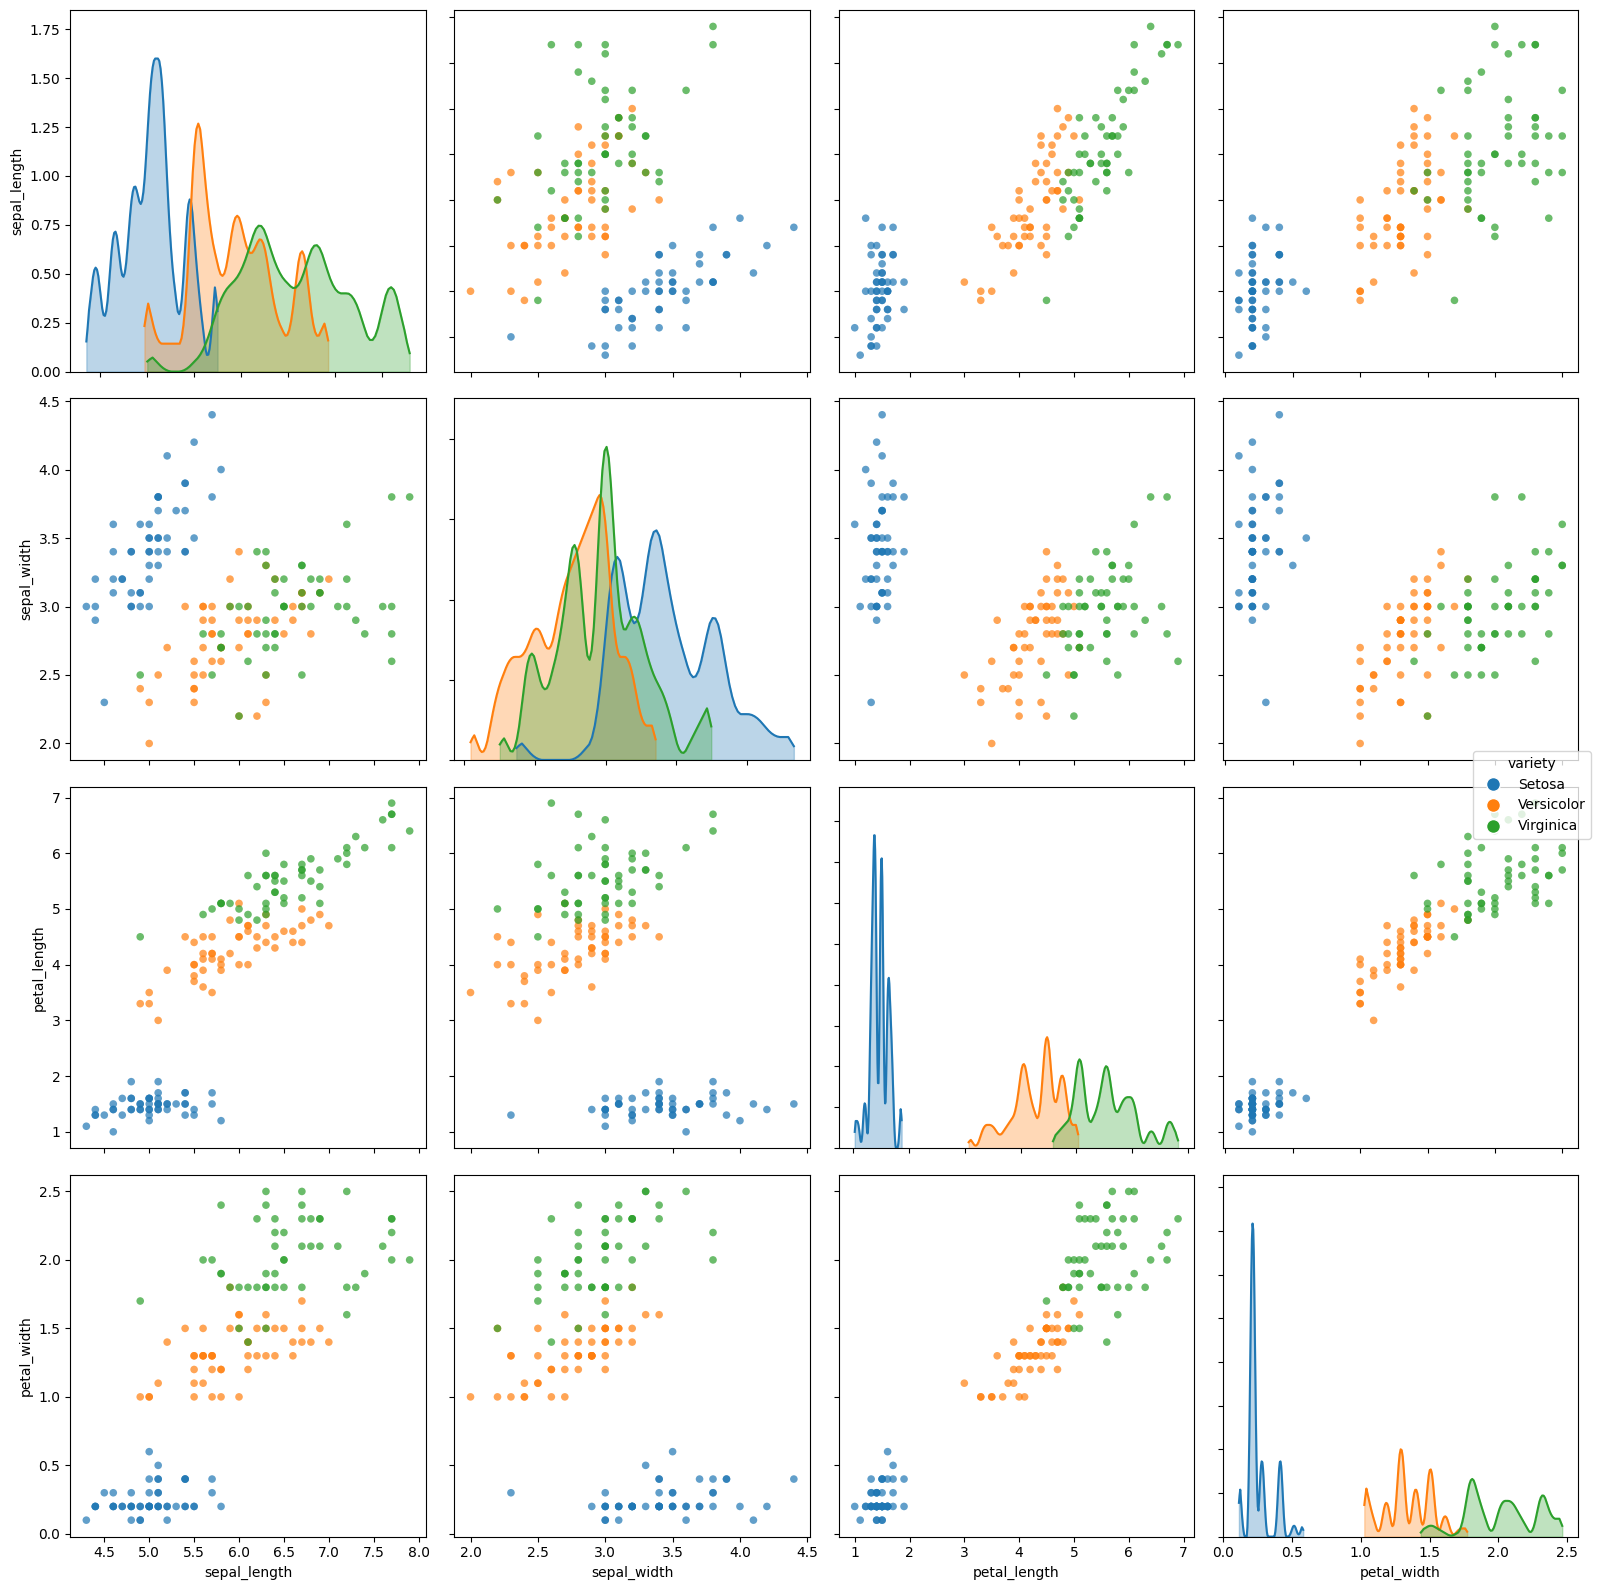

In [4]:
# Sprawdzenie czy wszystkie nazwy cech są prawidłowe
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Utworzenie siatki wykresów 4x4
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Kolory dla poszczególnych gatunków
colors = {'Setosa': 'tab:blue', 'Versicolor': 'tab:orange', 'Virginica': 'tab:green'}

# Wypełnianie wykresów
for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        
        if i == j:  # Na przekątnej - histogramy
            # Czyszczenie osi
            ax.clear()
            
            # Rysowanie histogramów dla każdego gatunku
            for variety, group in df.groupby('variety'):
                data = group[feature_names[i]]
                # Histogram z gęstością prawdopodobieństwa
                hist, bin_edges = np.histogram(data, bins=15, density=True)
                bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
                
                # Wygładzanie histogramu
                x_interp = np.linspace(min(bin_centers), max(bin_centers), 100)
                y_hist = np.interp(x_interp, bin_centers, hist)
                
                # Wygładzanie za pomocą ruchomej średniej
                window_size = 5
                kernel = np.ones(window_size) / window_size
                y_smooth = np.convolve(y_hist, kernel, mode='same')
                
                # Rysujemy wypełniony obszar
                ax.fill_between(x_interp, y_smooth, alpha=0.3, color=colors[variety])
                ax.plot(x_interp, y_smooth, color=colors[variety], lw=1.5)
            
            # Ustawienie zakresu osi Y by histogram był na dole wykresu
            y_min, y_max = ax.get_ylim()
            ax.set_ylim(0, y_max * 1.1)
                
        else:  # Poza przekątną - wykresy rozproszenia
            ax.clear()
            
            # Rysowanie wykresu rozproszenia dla par cech
            for variety, group in df.groupby('variety'):
                ax.scatter(
                    group[feature_names[j]], 
                    group[feature_names[i]], 
                    alpha=0.7, 
                    color=colors[variety],
                    s=30,
                    edgecolor='none'
                )
            
            # Automatyczne dostosowanie zakresu osi
            ax.autoscale(True)

# Ustawienie etykiet osi - bardziej bezpośrednie podejście
for i in range(4):
    # Ustaw etykiety osi Y dla pierwszej kolumny (wszystkie wiersze)
    axes[i, 0].set_ylabel(feature_names[i])
    
    # Ustaw etykiety osi X tylko dla ostatniego wiersza
    for j in range(4):
        axes[3, j].set_xlabel(feature_names[j])

# Usunięcie zbędnych etykiet
for i in range(4):
    for j in range(4):
        # Usuń etykiety osi Y dla wszystkich kolumn oprócz pierwszej
        if j > 0:
            axes[i, j].set_yticklabels([])
        
        # Usuń etykiety osi X dla wszystkich wierszy oprócz ostatniego
        if i < 3:
            axes[i, j].set_xticklabels([])

# Usunięcie pustych miejsc między wykresami
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# Dodanie legendy
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=variety) 
           for variety, color in colors.items()]
fig.legend(handles=handles, labels=colors.keys(), loc='center right', title='variety')

# Dostosowanie układu
plt.tight_layout()
plt.show()